<a href="https://colab.research.google.com/github/naseembabu/Audio-Data-Processing/blob/main/Working_with_Audio_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://heartbeat.fritz.ai/working-with-audio-signals-in-python-6c2bd63b2daf

In [1]:
!pip install librosa

In [44]:
import librosa
import IPython.display
import numpy as np
import soundfile as sf

# Loading the Audio files

In [14]:
# Path to the audio file 
audio_path = "redhot.wav"

In [30]:
# This return an audio time series as a numpy array with a default sampling rate (sr) of 22KHz
x , sr= librosa.load(audio_path, sr = 88000)

In [16]:
# We can change this behavior by resampling at sr = 44khz

x = librosa.load(audio_path, sr = 44000)

# Playing the audio file, "IPython.display.Audio"

IPython.display.Audio(audio_path)

In [17]:
IPython.display.Audio(audio_path)

# Waveform visualization: To visualize the sampled signal and plot it amplitude vs time

In [18]:
import matplotlib.pyplot as plt
import librosa.display

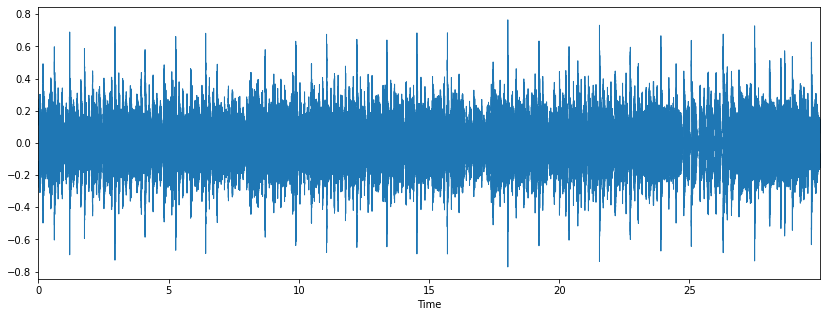

In [31]:
plt.figure(figsize=(14, 5))
#plotting the sampled signal
librosa.display.waveplot(x, sr = sr)

In [32]:
print(sr)

88000


# Spectrogram

A spectrogram is a visual representation of the spectrum of frequencies of a signal as it varies with time. They are time-frequency portraits of signals. Using a spectrogram, we can see how energy levels (dB) vary over time.

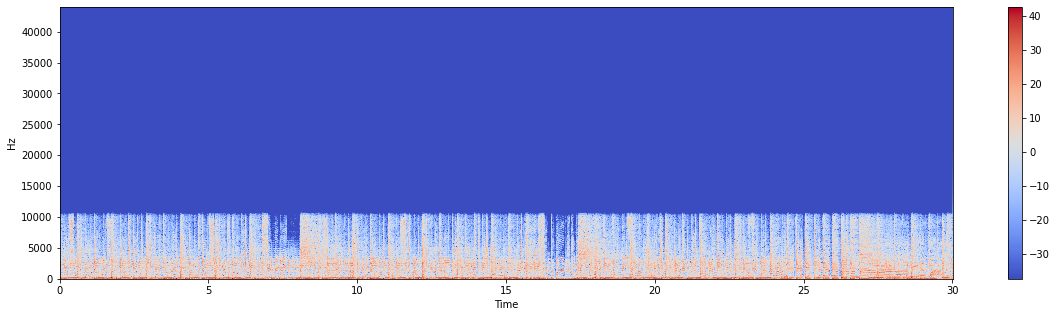

In [34]:
# x: numpy array

X = librosa.stft(x)

# Converting into energy levels(dB)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Log-frequency axis

Features can be obtained from a spectrogram by converting the linear frequency axis, as shown above, into a logarithmic axis. The resulting representation is also called a log-frequency spectrogram. The code we need to write here is:
"librosa.display.specshow(Xdb, sr=sr, x_axis=’time’, y_axis=’log’)"

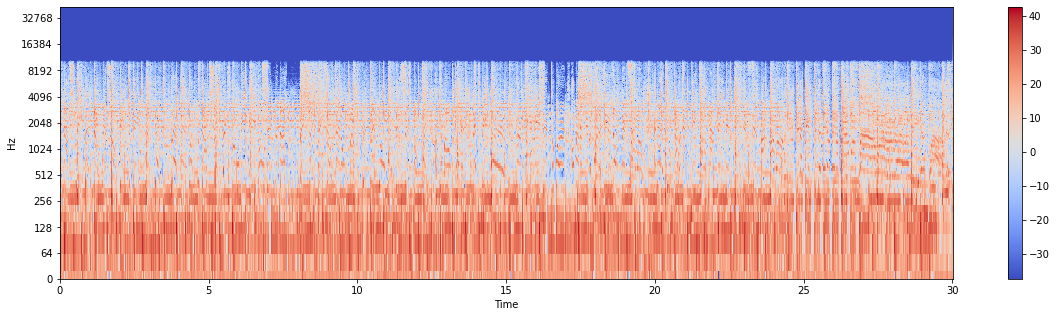

In [35]:
X = librosa.stft(x)

# Converting into energy levels(dB)

Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(20, 5))
librosa.display.specshow(Xdb, sr = sr, x_axis='time', y_axis='log')
plt.colorbar()

# Creating an audio signal and saving it

In [48]:
sr = 22050 # sample rate

T = 5.0 # seconds

t = np.linspace(0, T, int(T*sr), endpoint = False) # time variable
x = 0.5 * np.sin(2*np.pi*220*t) # pure sin wave at 220 hz

# playing generated audio
IPython.display.Audio(x, rate = sr) # load a Numpy array

sf.write('generated.wav', x, sr) # writing wave file in .wav format

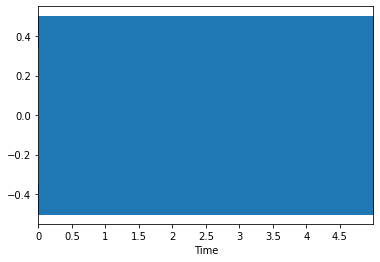

In [58]:
librosa.display.waveplot(x, sr)

# Pre- processing of Audio signals

In [ ]:
# min = minimum value for each row of the vector signal
#max = maximum value for each row of vector signal

def normalize(x, axis = 0):
  return sklearn.preprocessing.minmax_scale(x, axis = axis)

# Plotting the spectral Centroid along the waveform

librosa.display.waveplot(x, sr = sr, alpha = 0.4)
plt.plot(t, normalize(spectral_centroids), color = 'r')

# Pre-emphasis

Text(0.5, 1.0, 'Original Signal')

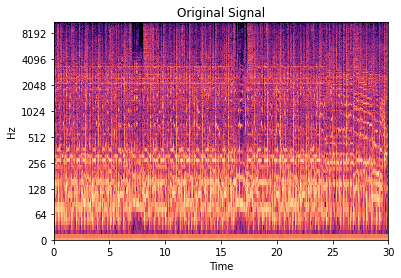

In [55]:
# y is Audio time series
y, sr = librosa.load(audio_path)
y_filt = librosa.effects.preemphasis(y)

# and plot the results for comparison

S_orig = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref = np.max)
S_preemph = librosa.amplitude_to_db(np.abs(librosa.stft(y_filt)), ref = np.max)
librosa.display.specshow(S_orig, y_axis = 'log', x_axis='time')
plt.title('Original Signal')

Text(0.5, 1.0, 'Pre-emphasized signal')

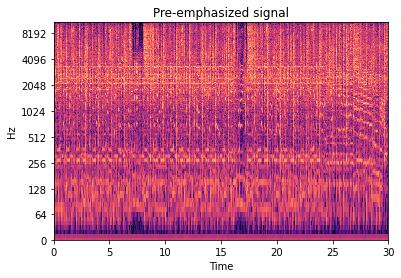

In [56]:
librosa.display.specshow(S_preemph, y_axis='log', x_axis='time')
plt.title('Pre-emphasized signal')

# Feature extraction from audio signals

Zero Crossing Rate

(400,)

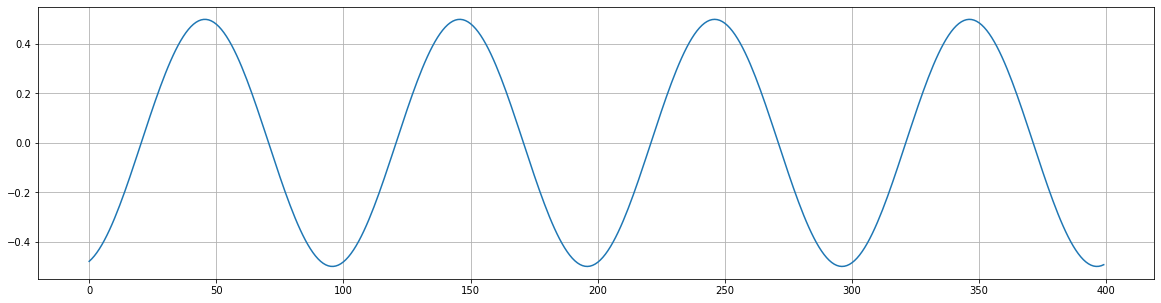

In [61]:
# zero crossings to be found between a given time
n0 = 9000
n1 = 9400
plt.figure(figsize=(20, 5))
plt.plot(x[n0:n1])
plt.grid()
zero_crossings = librosa.zero_crossings(x[n0:n1], pad = False)
zero_crossings.shape

Spectral Rolloff

In [64]:
y, sr = librosa.load(librosa.util.example_audio_file())
 # Approximation maximum frequencies with roll_percent = 0.85 (default)
rolloff = librosa.feature.spectral_rolloff(y=y, sr = sr)

# Approximation minimum frequencies with roll_percent=0.1

rolloff = librosa.feature.spectral_rolloff(y=y, sr = sr, roll_percent=0.1)
plt.show()

In [66]:
y = librosa.feature.mfcc(x, sr = sr)

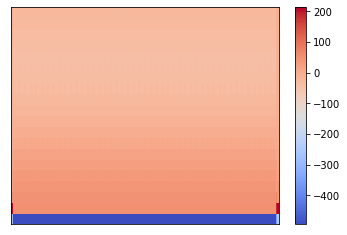

In [69]:
librosa.display.specshow(y)
plt.colorbar()